#### IMPORTTING PICKLE LIBRARY

In [ ]:
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/MyDrive/

/content/drive/MyDrive


#### LOADING DATA STORED IN PICKLE FILE

In [ ]:
X_ai = pickle.load(open('X_ai.pkl','rb'))
y_ai = pickle.load(open('y_ai.pkl','rb'))

In [ ]:
X_dl = pickle.load(open('X_dl.pkl','rb'))
y_dl = pickle.load(open('y_dl.pkl','rb'))

#### GETTING 255 PIXELS INTO 0-1 RANGE

In [ ]:
X_ai = X_ai/255


In [ ]:
X_dl = X_dl / 255

In [ ]:
X_ai.shape

(23000, 100, 100, 3)

#### IMPORTING EARLY STOPPING TO OVERCOME OVERFITTING

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=1,mode='min',verbose=1,restore_best_weights=True)

#### IMPORTING NECESSARY LAYERS

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
import tensorflow as tf
import tensorflow

#### BUILDING MODEL WITH HIDDEN LAYERS 

In [ ]:
model = tensorflow.keras.models.Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(100,100,3)))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(1,1), padding='valid'))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(1,1),padding='valid'))

model.add(Flatten())

model.add(Dense(64,activation='relu'))

model.add(Dense(2,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


#### FITTING THE MODEL

In [ ]:
model.fit(X_ai,y_ai,epochs=5,validation_data=(X_dl,y_dl),batch_size=64,callbacks=[early_stop])


Epoch 1/5
360/360 [==============================] - 71s 104ms/step - loss: 0.7870 - accuracy: 0.5115 - val_loss: 0.6915 - val_accuracy: 0.5015
Epoch 2/5
360/360 [==============================] - 36s 101ms/step - loss: 0.6814 - accuracy: 0.5620 - val_loss: 0.5975 - val_accuracy: 0.6585
Epoch 3/5
360/360 [==============================] - 37s 102ms/step - loss: 0.5658 - accuracy: 0.7053 - val_loss: 0.5617 - val_accuracy: 0.6940
Epoch 4/5
360/360 [==============================] - 37s 104ms/step - loss: 0.4923 - accuracy: 0.7626 - val_loss: 0.4873 - val_accuracy: 0.7675
Epoch 5/5
360/360 [==============================] - 37s 104ms/step - loss: 0.4236 - accuracy: 0.8004 - val_loss: 0.4551 - val_accuracy: 0.7850


#### DRAWING A PLOT B/W LOSS AND VAL_LOSS

In [ ]:
import pandas as pd
df = pd.DataFrame(model.history.history)

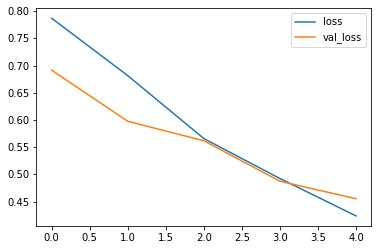

In [ ]:
df[['loss','val_loss']].plot()

#### CALCULATING LOSS AND ACCURACY

In [ ]:
test_loss, accuracy = model.evaluate(X_dl,y_dl)

63/63 [==============================] - 2s 17ms/step - loss: 0.4551 - accuracy: 0.7850


In [ ]:
print(accuracy)

0.7850000262260437


In [ ]:
from sklearn.metrics import classification_report

#### CALCULATING PREDICTIONS

In [ ]:
predictions = model.predict_classes(X_dl)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
print(classification_report(y_dl,predictions))

              precision    recall  f1-score   support

           0       0.82      0.74      0.77      1000
           1       0.76      0.83      0.80      1000

    accuracy                           0.79      2000
   macro avg       0.79      0.78      0.78      2000
weighted avg       0.79      0.79      0.78      2000



#### PRINTING PREDICTIONS 

[76 37 74 28 88 98 80 43 70 37 73 94 28 28 39 44 87 28 36 87]


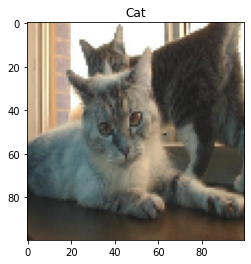

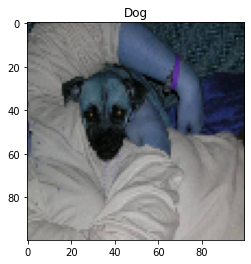

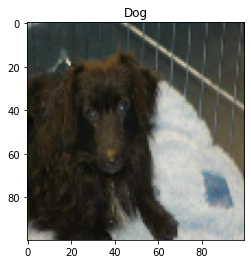

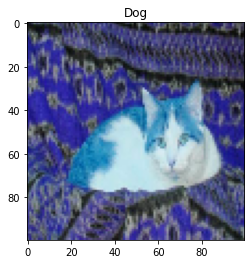

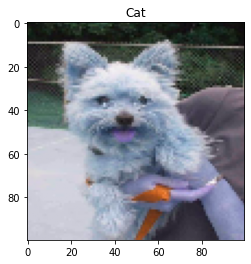

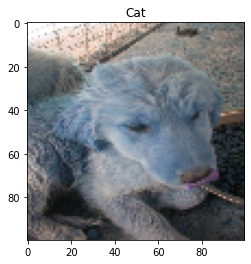

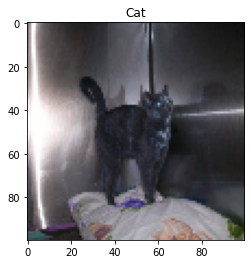

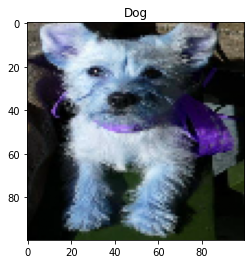

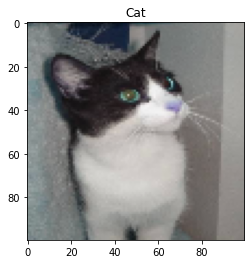

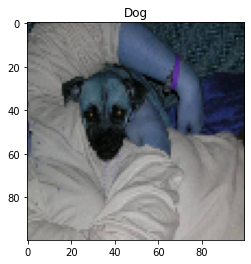

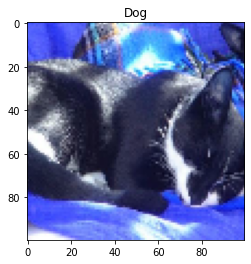

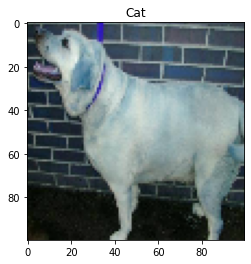

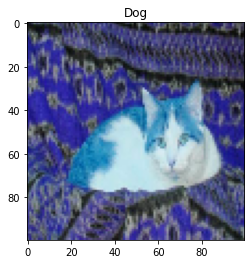

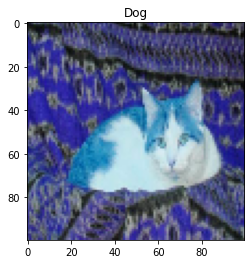

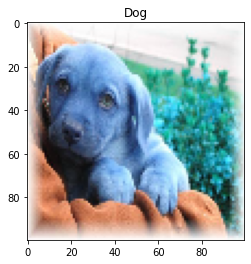

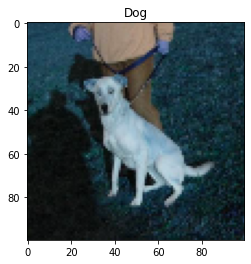

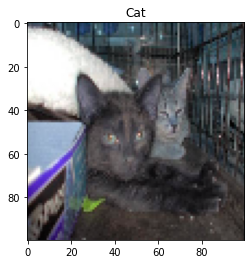

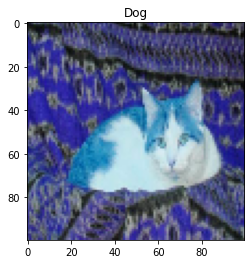

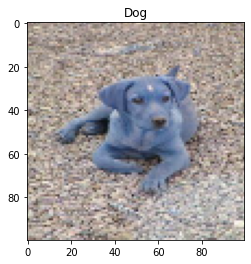

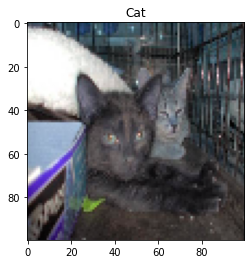

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()

imgs = np.random.randint(25,100,20)
print(imgs)

for i in imgs:
  model.out = np.argmax(model.predict(X_dl[i].reshape(1,100,100,3)))
  if model.out == 0:
    str_label = "Cat"
  else:
    str_label = "Dog"

  #print(model.out)
  plt.tight_layout()
  plt.title(str_label)
  plt.show(plt.imshow(X_dl[i]))


[43 38 39 26 20 34 35 12 43 24]


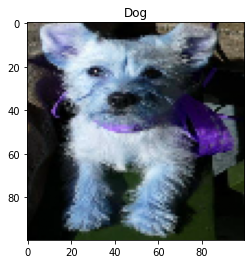

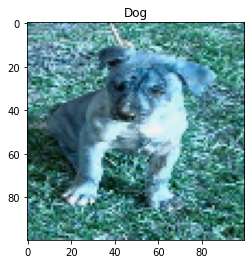

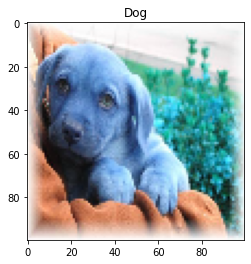

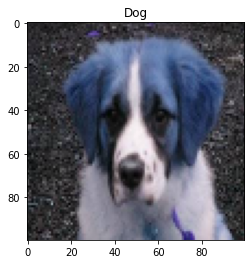

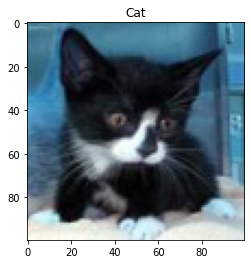

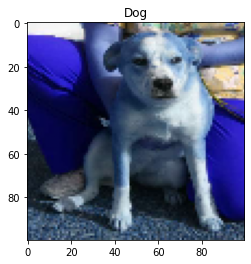

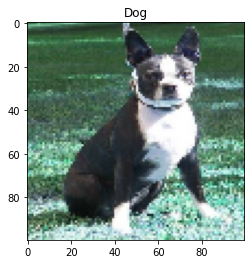

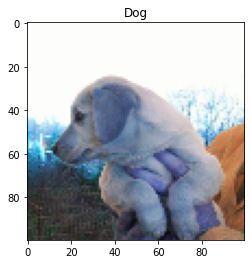

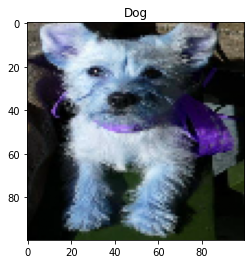

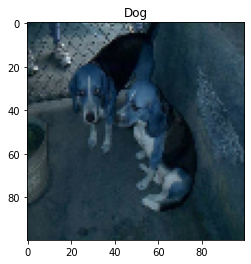

In [ ]:
fig = plt.figure()

imgs = np.random.randint(1,50,10)
print(imgs)

for i in imgs:
  model.out = np.argmax(model.predict(X_dl[i].reshape(1,100,100,3)))
  if model.out == 0:
    str_label = "Cat"
  else:
    str_label = "Dog"

  #print(model.out)
  plt.tight_layout()
  plt.title(str_label)
  plt.show(plt.imshow(X_dl[i]))

### `CONCLUSION`

#### I HAVE BUILT A MACHINE LEARNING MODEL WHICH PREDICT WHETHER THE GIVEN IMAGE IS A CAT OR DOG WITH AN ACCURACY OF 80% 